<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/ayushKumarMishra_12240340_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# DS504: AI-ML - Lab

## Assignment - 3

### 27/08/2024

</div>

---

<div align="center">

**Name:** Ayush Kumar Mishra  
**Roll No:** 12240340

</div>


# Importing all the necessary libraries

In [38]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import whisper
import gdown
import matplotlib.pyplot as plt
from jiwer import wer
import os
import zipfile
import requests
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import timm

# Ques-1

In [24]:
! pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 15.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801359 sha256=41549bc2a7d4703db99f3ae92514561dbfa52d7a527f6086094a4ca2f25eaaca
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


## Audio Transcription Using the Whisper Model

This script demonstrates how to transcribe audio files using OpenAI's Whisper model. The process involves downloading audio files from Google Drive, loading a pre-trained Whisper model, and transcribing the audio files to extract text.

### Steps in the Code

### 1. **Import Required Libraries**
- **whisper**: This library is used to load the Whisper model and perform audio transcription.
- **gdown**: This library facilitates downloading files from Google Drive.

### 2. **Download Audio Files**
The script uses `gdown` to download audio files from Google Drive. Ensure that the provided Google Drive links are publicly accessible.

### 3. **Load the Whisper Model**
The pre-trained Whisper model is loaded using the `whisper` library. This model is used to perform transcription on the audio files.

### 4. **Transcribe Audio Files**
The script iterates over a list of audio files, using the Whisper model to transcribe each file. The transcriptions are stored in a list and printed for review.

Each audio file is processed individually, and the resulting text from each transcription is displayed.

This process allows for automated transcription of audio data using a pre-trained model, making it useful for tasks such as speech-to-text conversion and analysis of audio content.


In [32]:
# Download audio files from Google Drive
gdown.download("https://drive.google.com/uc?id=1DqTNffiW_NIqD-l3y_Cs4R-82LzIrpah", "first.wav", quiet=False)
gdown.download("https://drive.google.com/uc?id=1IhDunwM18_kazBybawNNiEDuvY0ZxEoO", "second.wav", quiet=False)
gdown.download("https://drive.google.com/uc?id=11UQ9C-cR3D2lXLPmPllThMrXDxCg_1FZ", "third.wav", quiet=False)
gdown.download("https://drive.google.com/uc?id=1LmQCrskrL7w2t1O1g6y2Ta7KHMLfxeTL", "fourth.wav", quiet=False)
gdown.download("https://drive.google.com/uc?id=1x2kqtYLZ2iS4PX9iReJpKiijSp9jSWBb", "fifth.wav", quiet=False)

model = whisper.load_model("base")

audio_files = ["first.wav", "second.wav", "third.wav", "fourth.wav", "fifth.wav"]
transcriptions = []

for audio_file in audio_files:
    result = model.transcribe(audio_file)
    transcriptions.append(result['text'])
    print(f"Transcription for {audio_file}: {result['text']}")


Downloading...
From: https://drive.google.com/uc?id=1DqTNffiW_NIqD-l3y_Cs4R-82LzIrpah
To: /content/first.wav
100%|██████████| 56.9k/56.9k [00:00<00:00, 3.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IhDunwM18_kazBybawNNiEDuvY0ZxEoO
To: /content/second.wav
100%|██████████| 60.9k/60.9k [00:00<00:00, 2.69MB/s]
Downloading...
From: https://drive.google.com/uc?id=11UQ9C-cR3D2lXLPmPllThMrXDxCg_1FZ
To: /content/third.wav
100%|██████████| 47.2k/47.2k [00:00<00:00, 37.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LmQCrskrL7w2t1O1g6y2Ta7KHMLfxeTL
To: /content/fourth.wav
100%|██████████| 59.8k/59.8k [00:00<00:00, 3.37MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x2kqtYLZ2iS4PX9iReJpKiijSp9jSWBb
To: /content/fifth.wav
100%|██████████| 120k/120k [00:00<00:00, 3.82MB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:146: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickl

Transcription for first.wav:  My name is Ayush Kumar Mishra.
Transcription for second.wav:  This is a Simon 2 of AIML lab.
Transcription for third.wav:  Today is Redness Day
Transcription for fourth.wav:  Now you can download these files in your notebook as follows.
Transcription for fifth.wav:  These updates should resolve the zero division error and ensure that the calculations are robust.


In [33]:
! pip install jiwer

## Calculating Word Error Rate (WER) for Transcriptions

This section of the script calculates the Word Error Rate (WER) to evaluate the accuracy of the transcriptions produced by the Whisper model. WER measures how well the transcribed text matches the expected ground truth sentences.

### Steps in the Code

### 1. **Import the WER Library**

- **jiwer**: This library is used to compute the Word Error Rate between the ground truth and the transcribed text.

### 2. **Define Ground Truths and Calculate WER**

- **Ground Truths**: These are the correct sentences that serve as the reference for comparison.
- **Transcriptions**: These are the sentences generated by the Whisper model from the audio files.

### 3. **Compute WER for Each Sentence**

For each ground truth sentence, the WER is calculated against its corresponding transcription. This step provides an error percentage indicating how much the transcription deviates from the expected text.

### 4. **Calculate Aggregate WER**

The average WER across all sentences is computed to provide an overall measure of transcription accuracy.

By comparing the transcriptions to the ground truths and calculating the WER, you can evaluate the performance of the transcription model and identify areas for improvement.


In [37]:
ground_truths = ["My name is Ayush Kumar Mishra.", "This is Assignment 2 of AIML lab.", "Today is Wednes Day","Now you can download these files in your notebook as follows.","These updates should resolve the zero division error and ensure that the calculations are robust."]

errors = []
for truth, transcription in zip(ground_truths, transcriptions):
    error = wer(truth, transcription)
    errors.append(error)
    print(f"WER for {truth}: {error:.2%}")

# Aggregate WER
average_wer = sum(errors) / len(errors)
print(f"Aggregate WER: {average_wer:.2%}")


WER for My name is Ayush Kumar Mishra.: 0.00%
WER for This is Assignment 2 of AIML lab.: 28.57%
WER for Today is Wednes Day: 25.00%
WER for Now you can download these files in your notebook as follows.: 0.00%
WER for These updates should resolve the zero division error and ensure that the calculations are robust.: 0.00%
Aggregate WER: 10.71%


# QUES-2

In [4]:
! pip install torch torchvision timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.6 MB/s eta 0:00:00


## Downloading and Extracting the Roboflow Dataset

This script downloads a dataset from Roboflow, extracts it from a ZIP file, and prepares it for use.

### Steps in the Code

### 1. **Import Required Libraries**

- **os**: Provides functions to interact with the operating system.
- **zipfile**: Allows handling ZIP files.
- **requests**: Used to send HTTP requests.

### 2. **Define URL and Paths**

- **URL**: The direct link to download the dataset from Roboflow.
- **dataset_path**: The local path where the downloaded ZIP file will be saved.

### 3. **Download the Dataset**

- Use the `requests.get()` function to send an HTTP GET request to the specified URL.
- Write the content of the response to a file named `roboflow_dataset.zip`.

### 4. **Extract the ZIP File**

- Open the ZIP file using `zipfile.ZipFile()` and extract its contents to the directory `roboflow_dataset`.

### 5. **Clean Up**

- Remove the ZIP file after extraction using `os.remove()` to free up space.

This process ensures that the dataset is downloaded and ready for further use or processing in your project.


In [1]:
url = "https://public.roboflow.com/ds/on5dKPftN9?key=vjl0Jd4vmE"
dataset_path = "roboflow_dataset.zip"


response = requests.get(url)
with open(dataset_path, "wb") as file:
    file.write(response.content)

with zipfile.ZipFile(dataset_path, "r") as zip_ref:
    zip_ref.extractall("roboflow_dataset")

os.remove(dataset_path)


## Setting Up Data Loading with PyTorch

This section prepares image data for training and validation by setting up data loaders using PyTorch's `torchvision` library.

### Steps in the Code

### 1. **Import Required Modules**

- **Transforms**: Provides data transformation utilities from `torchvision`.
- **Datasets**: Contains predefined datasets and dataset utilities.
- **DataLoader**: A utility for batching and shuffling data.

### 2. **Define Data Transformations**

- **Resize**: Adjusts images to a uniform size of 224x224 pixels to ensure consistency with the model's input requirements.
- **ToTensor**: Converts images into PyTorch tensors, which are required for processing in the model.

### 3. **Load Datasets**

- **ImageFolder**: Loads image data from directories where images are organized into subdirectories corresponding to class labels.
  - `root` specifies the path to the dataset directories.
  - `transform` applies the defined transformations to the images.

### 4. **Create DataLoaders**

- **DataLoader**: Creates data loaders for the training and validation datasets, handling batching and shuffling of data.
  - `batch_size` determines the number of samples per batch.
  - `shuffle=True` for training data ensures random sampling of images, while `shuffle=False` for validation data maintains the order.

This setup allows for efficient processing of image data during the training and evaluation of models.


In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root='roboflow_dataset/train', transform=transform)
val_dataset = datasets.ImageFolder(root='roboflow_dataset/valid', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


## Preparing the Model for Fine-Tuning

This section of the script prepares a Vision Transformer model for a classification task by modifying its head for custom output and setting it up for training.

### Steps in the Code

### 1. **Import Required Libraries**

- **torch**: PyTorch library for deep learning.
- **torch.nn**: Contains neural network modules and loss functions.
- **timm**: Provides access to a wide range of pretrained models.

### 2. **Setup Device**

- **Device**: Determines whether to use a GPU (`cuda`) or CPU for computation based on availability.

### 3. **Load Pretrained Model**

- **Model**: A Vision Transformer model (`deit_base_patch16_224`) is loaded with pretrained weights from TimM's model zoo.

### 4. **Freeze Model Parameters**

- **Freeze Parameters**: Sets `requires_grad` to `False` for all model parameters to prevent them from being updated during training. This is useful when you want to fine-tune only specific parts of the model.

### 5. **Modify Model Head**

- **Head Modification**: The model’s classification head is replaced with a new one:
  - **First Layer**: A fully connected layer with 512 units and ReLU activation.
  - **Dropout**: Applied with a rate of 0.5 to prevent overfitting.
  - **Second Layer**: A fully connected layer with output size equal to the number of labels in the dataset.

### 6. **Move Model to Device**

- **Transfer Model**: Moves the model to the GPU or CPU as specified.

This setup ensures that the Vision Transformer model is adapted to the specific classification task and ready for training.


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = timm.create_model('deit_base_patch16_224', pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_labels = len(train_dataset.classes)
model.head = nn.Sequential(
    nn.Linear(model.head.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_labels)
)

model = model.to(device)


## Setting Up Loss Function and Optimizer

This section configures the loss function and optimizer for training the model.

### Steps in the Code

### 1. **Define Loss Function**

- **CrossEntropyLoss**: Used for multi-class classification problems. It combines `nn.LogSoftmax` and `nn.NLLLoss` in one single class. It computes the cross-entropy loss between the target labels and the model’s predictions.

### 2. **Configure Optimizer**

- **Adam Optimizer**: An adaptive learning rate optimization algorithm. It updates the model parameters using the gradient information and includes momentum and adaptive learning rate features.
  - **Parameters**: Configured to update only the parameters of the modified model head (`model.head.parameters()`).
  - **Learning Rate**: Set to 0.001 (1e-3) to control the step size during optimization.

This configuration will help in optimizing the model's performance by minimizing the loss function during training.


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.head.parameters(), lr=1e-3)


## Training the Model

This section trains the model for a specified number of epochs, updating the model weights to minimize the loss function.

### Steps in the Code

### 1. **Set Number of Epochs**

- **Epochs**: Defines the number of times the entire training dataset will be passed through the model.

### 2. **Training Loop**

- **Loop through Epochs**: Iterates through the number of epochs specified.
  - **Model in Training Mode**: Sets the model to training mode using `model.train()`, enabling dropout and batch normalization.

  - **Initialize Running Loss**: Resets the running loss tracker for each epoch.

  - **Loop through DataLoader**: Iterates through batches of images and labels from the training data.
    - **Move Data to Device**: Transfers images and labels to the GPU or CPU as specified.
    - **Zero Gradients**: Clears old gradients from the previous step with `optimizer.zero_grad()`.
    - **Forward Pass**: Computes model outputs for the current batch of images.
    - **Compute Loss**: Calculates the loss between the model’s predictions and the true labels using the defined loss function.
    - **Backward Pass**: Computes gradients with `loss.backward()`.
    - **Update Weights**: Adjusts the model weights using `optimizer.step()` based on the computed gradients.
    - **Accumulate Loss**: Adds the loss for the current batch to the running total.

  - **Calculate and Print Loss**: Computes the average loss for the epoch and prints it.

This process iteratively improves the model’s performance by minimizing the loss function over multiple epochs.


In [7]:
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 0.1982
Epoch 2/10, Loss: 0.1016
Epoch 3/10, Loss: 0.0738
Epoch 4/10, Loss: 0.0561
Epoch 5/10, Loss: 0.0352
Epoch 6/10, Loss: 0.0235
Epoch 7/10, Loss: 0.0197
Epoch 8/10, Loss: 0.0173
Epoch 9/10, Loss: 0.0113
Epoch 10/10, Loss: 0.0117


## Evaluating the Model

This section evaluates the model’s performance on the validation dataset after training.

### Steps in the Code

### 1. **Set Model to Evaluation Mode**

- **Model in Evaluation Mode**: Uses `model.eval()` to set the model to evaluation mode. This disables dropout and batch normalization, ensuring that the model’s predictions are not affected by these layers.

### 2. **Initialize Metrics**

- **Correct and Total**: Initializes counters for the number of correct predictions and the total number of samples.

### 3. **Evaluation Loop**

- **No Gradient Calculation**: Uses `torch.no_grad()` to prevent gradient calculations, which saves memory and computation during evaluation.

  - **Loop through DataLoader**: Iterates through batches of images and labels from the validation data.
    - **Move Data to Device**: Transfers images and labels to the GPU or CPU as specified.
    - **Forward Pass**: Computes model outputs for the current batch of images.
    - **Predict Classes**: Uses `torch.max` to get the predicted class with the highest probability.
    - **Update Metrics**: Adds to the total number of samples and counts the number of correct predictions.

### 4. **Print Validation Accuracy**

- **Accuracy Calculation**: Computes the percentage of correctly predicted samples out of the total samples.
- **Print Result**: Displays the validation accuracy as a percentage.

This evaluation helps to assess how well the model performs on unseen data and indicates its generalization capability.


In [8]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total:.2f}%')

Validation Accuracy: 95.60%


In [10]:
torch.save(model.state_dict(), "multi_label_vit_model.pth")

model.load_state_dict(torch.load("multi_label_vit_model.pth"))
model.eval()

<ipython-input-10-d6be2214dba1>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("multi_label_vit_model.pth"))


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

## Displaying an Image

This section demonstrates how to display an image using Matplotlib.

### Steps in the Code

### 1. **Load the Image**

- **Image Path**: Specifies the path to the image file.
- **Open and Convert**: Loads the image from the specified path and converts it to RGB format using `Image.open(image_path).convert("RGB")`.

### 2. **Display the Image**

- **Use Matplotlib**: Utilizes `plt.imshow(image)` to display the image.
  - **Hide Axes**: Applies `plt.axis('off')` to hide the axes, making the image display without any axis lines or labels.
  - **Show Image**: Calls `plt.show()` to render the image in the output.

This visualization allows you to view the image directly within your notebook or script.


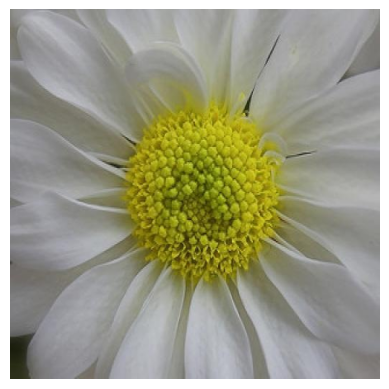

In [22]:

image_path = "/content/ts.jpg"
image = Image.open(image_path).convert("RGB")


plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## Image Classification and Label Prediction

This section demonstrates how to classify an image using a trained model and interpret the results.

### Steps in the Code

### 1. **Image Transformation**

- **Define Transformations**: Creates a transformation pipeline using `transforms.Compose()`.
  - **Resize**: Resizes the image to a fixed size of 224x224 pixels.
  - **To Tensor**: Converts the image to a tensor format suitable for model input.
- **Apply Transformations**: Applies the defined transformations to the image and adds a batch dimension with `.unsqueeze(0)`.
- **Move to Device**: Transfers the transformed image tensor to the GPU or CPU as specified.

### 2. **Model Inference**

- **Set Model to Evaluation Mode**: Uses `model.eval()` to set the model to evaluation mode, disabling dropout and batch normalization.
- **No Gradient Calculation**: Uses `torch.no_grad()` to prevent gradient calculations during inference.
- **Model Output**: Computes the model outputs for the input image.
- **Convert to Probabilities**: Applies the sigmoid function to get probabilities and moves the results to the CPU and converts them to NumPy arrays.

### 3. **Display Raw Output and Probabilities**

- **Print Outputs**: Displays the raw model output and the computed probabilities.

### 4. **Label Prediction**

- **Set Threshold**: Defines a threshold (0.1 in this case) to classify the probabilities into binary labels.
- **Predict Labels**: Converts probabilities to binary predictions based on the threshold.
- **Map to Labels**: Maps the binary predictions to actual labels using `label_names`, displaying the labels that are present.

This process involves transforming an image, running it through a model to get predictions, and interpreting these predictions to identify relevant labels.


In [17]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [18]:
image = transform(image).unsqueeze(0)
image = image.to(device)


In [19]:
model.eval()
with torch.no_grad():
    outputs = model(image)
    probs = torch.sigmoid(outputs).cpu().detach().numpy()


In [20]:
print("Raw model output:", outputs.cpu().detach().numpy())
print("Probabilities:", probs)


Raw model output: [[-0.03729061 -0.06600924]]
Probabilities: [[0.49067843 0.48350367]]


In [21]:
threshold = 0.1
predicted_labels = (probs > threshold).astype(int)

present_labels = [label_names[i] for i in range(len(label_names)) if predicted_labels[0][i] == 1]

print("Labels for the image:", present_labels)


Labels for the image: ['daisy', 'dandelion']
